[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ds-reboot/python-first-part/blob/main/notebooks/hometasks/Task2_dmrf_visual.ipynb)

# Задание
* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить результаты в pandas dataframe
<hr>

* Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных:
-- Привести колонки датафрейма к одному типу данных
-- Проверить индекс, чтобы он соответствовал порядку строк
-- Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки
<hr>

* Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
-- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
-- Рассчитать объемы вводимого жилья по регионам и по годам.
-- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах
-- Визуализировать разброс, связь и распределение этих показателей по регионам
-- Сделать выводы по каждому из расчетов и графиков



In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import random
# !pip install plotly
import plotly.express as px

# Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"

Определяем кол-во объектов

In [ ]:
offset_ = 1
limit_ = 1
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
res = requests.get(url)

In [ ]:
objects_data = res.json()
limit_ = objects_data.get('data').get('total')
limit_

Формируем список объектов

In [ ]:
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
res = requests.get(url)
res

Запрашиваем частями

In [ ]:
part_value = 5000
objids = []
parts = limit_//part_value + 1
print ("Всего частей: " + str(parts))
for i in range (1, parts + 1):
    #print (i)
    part_offset = 1 + part_value * (i - 1)
    part_limit = part_value * i
    url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={part_offset}&limit={part_limit}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
    res = requests.get(url)
    objects_data = res.json()
    objects_list = objects_data.get('data').get('list')
    print (len (objects_list))
    objids += [x.get('objId') for x in objects_list]
    print (str(part_offset) + " - " + str(part_limit) + " - done")
    print (len(objids))

# Cохранить результаты в pandas dataframe

In [ ]:
objids_set = set (objids) #убираем возможные дубликаты
len (objids_set)

In [ ]:
object_data = [requests.get(f'https://наш.дом.рф/сервисы/api/object/{x}').json().get('data') for x in objids_set]
df = pd.json_normalize(object_data)

In [ ]:
df

Сохраним в excel чтобы не грузить сайт каждый раз

In [ ]:
df.to_excel("Task2_object_data.xlsx")

Прочитаем из excel

In [3]:
df_excel = pd.read_excel("Task2_object_data.xlsx")

In [4]:
df_excel

,Unnamed: 0,id,pdId,region,address,nameObj,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,...,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors
0,0,32787,181636,16,"г Набережные Челны, вдоль проспекта Яшьлек, бл...","ЖК ""Современный""",12.0,13,99,2022-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,32793,162963,50,"г Красногорск, район Марьино, корпус 25","Микрогород ""В лесу""",9.0,13,545,2023-03-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,32849,167016,37,"г Кохма, улица Ивановская, литера В, 5 этап","Микрорайон ""Тихий Берег"", 004",8.0,8,183,2022-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,32873,141586,42,"г Кемерово, бульвар Строителей, д. 60, корпус 4/1",NaN,12.0,14,189,2022-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,32892,117906,50,"с/п Павло-Слободское, улица Красная, д. 9","ЖК ""СКАЗКА"" дом 64",3.0,3,22,2022-12-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10593,10593,32618,152681,24,"г Красноярск, район Советский, переулок Светло...","Жилой комплекс ""пер.Светлогорский II очередь о...",10.0,20,288,2025-09-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10594,10594,32629,173074,27,"город Хабаровск, переулок Гражданский, д. 9","Жилой Комплекс ""Кристалл""",25.0,25,89,2022-09-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10595,10595,32677,174688,69,"г Тверь, ул Планерная, д. 10, блок-секция 7,8,9","ЖК ""Созвездие"", ЖИЛОЙ КОМПЛЕКС ""СОЗВЕЗДИЕ""",11.0,11,129,2024-09-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10596,10596,32710,90412,50,"г Дзержинский, улица Угрешская, д. 19","Red.19 (Республика Дзержинский, 19)",9.0,9,0,2022-09-30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_excel.shape

(10598, 109)

# Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных:
-- Привести колонки датафрейма к одному типу данных
-- Проверить индекс, чтобы он соответствовал порядку строк
-- Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки

In [6]:
df_excel = df_excel.drop(columns=['Unnamed: 0'])

In [7]:
df_excel.dtypes

id                int64
pdId              int64
region            int64
address          object
nameObj          object
                 ...   
metro.line       object
metro.color      object
metro.time      float64
metro.isWalk    float64
metro.colors     object
Length: 108, dtype: object

# Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
-- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
-- Рассчитать объемы вводимого жилья по регионам и по годам.
-- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах
-- Визуализировать разброс, связь и распределение этих показателей по регионам
-- Сделать выводы по каждому из расчетов и графиков

## Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.

objSquareLiving - Жилая площадь, м2
objPriceAvg - Средняя цена за 1 м²

$$ RegionPriceAvg = \frac{\sum_{i=1}^{n} (objSquareLiving_i * objPriceAvg_i)}{\sum_{i=1}^{n} (objSquareLiving_i)} $$


Посмотрим на заполнение необходимых для расчета полей
Можно заметить, что есть поля objSquareLiving и objFlatSq, которые похоже по смыслу

In [8]:
df_excel[['region','objSquareLiving', 'objFlatSq', 'objPriceAvg']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10598 entries, 0 to 10597
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   region           10598 non-null  int64  
 1   objSquareLiving  10598 non-null  float64
 2   objFlatSq        10598 non-null  float64
 3   objPriceAvg      7671 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 331.3 KB


Таким образом, данные по региону и жилой площади полные, а данные по средней цене заполнены в 72,38% записей.

In [9]:
dfAVGbyRegion = df_excel[['region','objSquareLiving', 'objFlatSq', 'objPriceAvg']]
dfAVGbyRegion

,region,objSquareLiving,objFlatSq,objPriceAvg
0,16,4226.31,4226.31,61267.0
1,50,27631.00,27631.00,151912.0
2,37,8770.60,8770.60,50710.0
3,42,9716.00,9716.00,63800.0
4,50,1540.00,1540.00,156122.0
...,...,...,...,...
10593,24,14157.72,14157.72,78851.0
10594,27,8110.30,8110.30,138698.0
10595,69,6700.80,6700.80,62414.0
10596,50,0.00,0.00,41263.0


Видим, что хоть жилая площадь заполнена везде, но есть строки с 0
Проверим есть ли различия в полях objSquareLiving и objFlatSq

In [10]:
dfAVGbyRegion[dfAVGbyRegion.objSquareLiving != dfAVGbyRegion.objFlatSq ]

,region,objSquareLiving,objFlatSq,objPriceAvg


Различий нет, поэтому такие строки удаляем, также удаляем колонку objFlatSq

In [11]:
dfAVGbyRegion = dfAVGbyRegion.drop(dfAVGbyRegion[dfAVGbyRegion.objSquareLiving == 0].index)
dfAVGbyRegion = dfAVGbyRegion.drop(columns=['objFlatSq'])
dfAVGbyRegion

,region,objSquareLiving,objPriceAvg
0,16,4226.31,61267.0
1,50,27631.00,151912.0
2,37,8770.60,50710.0
3,42,9716.00,63800.0
4,50,1540.00,156122.0
...,...,...,...
10592,23,9715.35,94409.0
10593,24,14157.72,78851.0
10594,27,8110.30,138698.0
10595,69,6700.80,62414.0


In [12]:
#Удаляем NaN значения в цене
dfAVGbyRegion = dfAVGbyRegion.dropna()
dfAVGbyRegion

,region,objSquareLiving,objPriceAvg
0,16,4226.31,61267.0
1,50,27631.00,151912.0
2,37,8770.60,50710.0
3,42,9716.00,63800.0
4,50,1540.00,156122.0
...,...,...,...
10592,23,9715.35,94409.0
10593,24,14157.72,78851.0
10594,27,8110.30,138698.0
10595,69,6700.80,62414.0


In [13]:
#Добавим столбец с полной стоимостью дома
dfAVGbyRegion = dfAVGbyRegion.assign(objPriceTotal = dfAVGbyRegion.objSquareLiving * dfAVGbyRegion.objPriceAvg)
dfAVGbyRegion[dfAVGbyRegion.region == 27]

,region,objSquareLiving,objPriceAvg,objPriceTotal
225,27,11370.96,129042.0,1.467331e+09
364,27,6960.14,54922.0,3.822648e+08
365,27,4980.82,54826.0,2.730784e+08
366,27,7877.77,55098.0,4.340494e+08
448,27,2882.50,41119.0,1.185255e+08
...,...,...,...,...
9401,27,4971.04,118666.0,5.898934e+08
9402,27,4971.04,114745.0,5.704020e+08
10103,27,8184.39,94985.0,7.773943e+08
10130,27,4184.73,57637.0,2.411953e+08


Найдем средние цены в регионе по формуле

In [14]:
dfAVGbyRegion_pivot = pd.pivot_table(dfAVGbyRegion, values=['objSquareLiving', 'objPriceTotal'], index=['region'],  aggfunc=sum)

In [15]:
dfAVGbyRegion_pivot

,objPriceTotal,objSquareLiving
region,,
1,1.147262e+10,174854.76
2,1.936296e+11,2366820.03
3,1.673009e+10,263652.28
4,1.348301e+09,16555.25
5,3.593246e+09,139034.67
...,...,...
78,1.326708e+12,7012831.12
86,3.660444e+10,370088.13
89,9.105785e+09,96268.35


In [16]:
dfAVGbyRegion_pivot = dfAVGbyRegion_pivot.assign(RegionPriceAvg = dfAVGbyRegion_pivot.objPriceTotal / dfAVGbyRegion_pivot.objSquareLiving)
dfAVGbyRegion_pivot['RegionPriceAvg']

region
1      65612.288944
2      81810.005620
3      63455.125014
4      81442.524894
5      25844.248022
          ...      
78    189182.910505
86     98907.347894
89     94587.523561
91    101981.230824
92    130411.776113
Name: RegionPriceAvg, Length: 78, dtype: float64

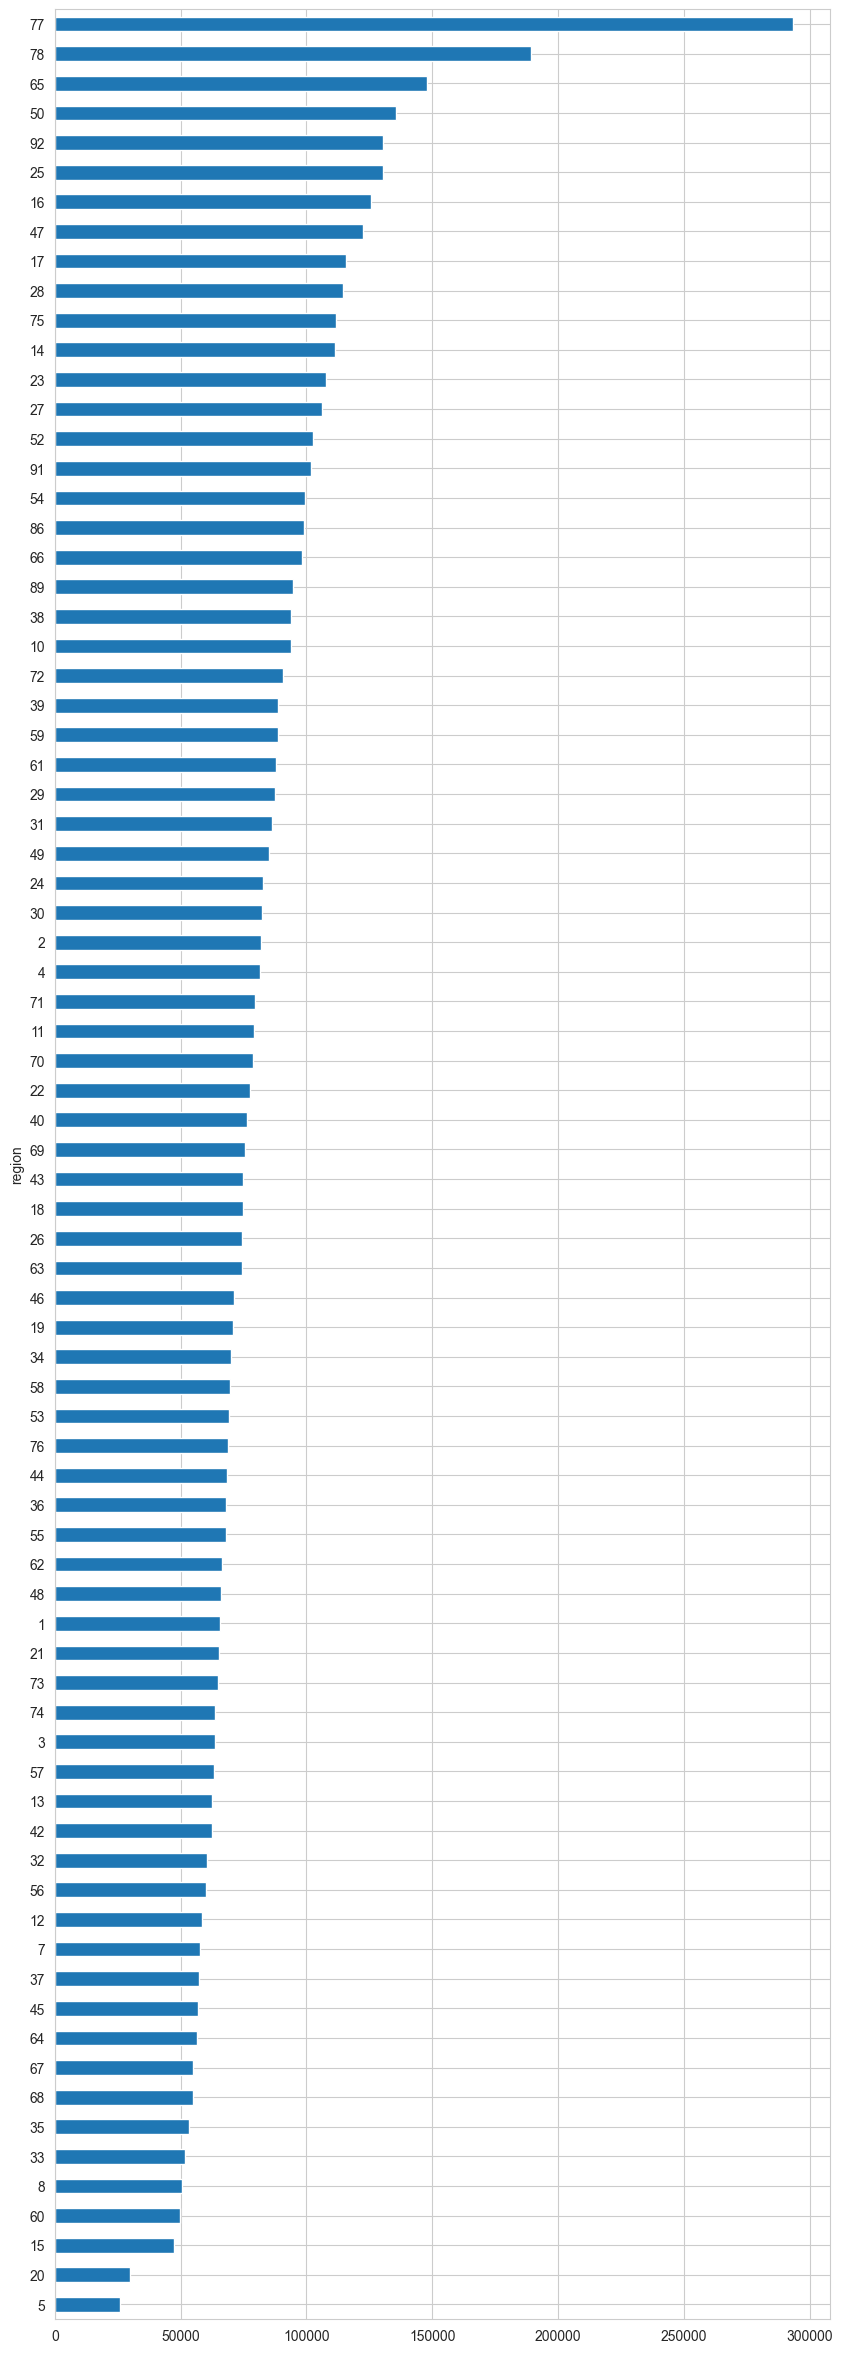

In [17]:
rcParams['figure.figsize'] = 10,30
dfAVGbyRegion_pivot['RegionPriceAvg'].sort_values().plot(kind='barh')
plt.show()

## Рассчитать объемы вводимого жилья по регионам и по годам.
Потребуются поля
objSquareLiving
region
objReady100PercDt

In [18]:
df_excel[df_excel.id == 32787]

,id,pdId,region,address,nameObj,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,...,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors
0,32787,181636,16,"г Набережные Челны, вдоль проспекта Яшьлек, бл...","ЖК ""Современный""",12.0,13,99,2022-12-31,Монолит-кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
dfReadyObjV = df_excel[['region', 'objSquareLiving', 'objReady100PercDt']]

In [ ]:
dfReadyObjV.info()

In [ ]:
dfReadyObjV.objReady100PercDt = pd.to_datetime(dfReadyObjV.objReady100PercDt)
dfReadyObjV.info()

In [ ]:
dfReadyObjV['objReady100PercYear'] = dfReadyObjV.objReady100PercDt.dt.year
dfReadyObjV = dfReadyObjV.drop(dfReadyObjV[dfReadyObjV.objSquareLiving == 0].index)

In [23]:
dfReadyObjV

,region,objSquareLiving,objReady100PercDt,objReady100PercYear
0,16,4226.31,2022-12-31,2022
1,50,27631.00,2023-03-31,2023
2,37,8770.60,2022-12-31,2022
3,42,9716.00,2022-12-31,2022
4,50,1540.00,2022-12-31,2022
...,...,...,...,...
10592,23,9715.35,2031-03-31,2031
10593,24,14157.72,2025-09-30,2025
10594,27,8110.30,2022-09-30,2022
10595,69,6700.80,2024-09-30,2024


In [24]:
dfReadyObjV_pivot = dfReadyObjV.groupby(['region','objReady100PercYear']).sum(['objSquareLiving']).reset_index()
dfReadyObjV_pivot.objReady100PercYear.max()

2038

In [25]:
dfReadyObjV_pivot

,region,objReady100PercYear,objSquareLiving
0,1,2022,27256.45
1,1,2023,112997.00
2,1,2024,59594.23
3,1,2025,15927.30
4,2,2020,1319.46
...,...,...,...
402,91,2028,24616.80
403,92,2022,20820.01
404,92,2023,10342.42
405,92,2024,27862.96


/var/folders/nr/zx8kt9ln7s78q206k1vs1nyw0000gp/T/ipykernel_3682/572847069.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(dfReadyObjV_pivot['objReady100PercYear'], rotation=60, horizontalalignment= 'right')


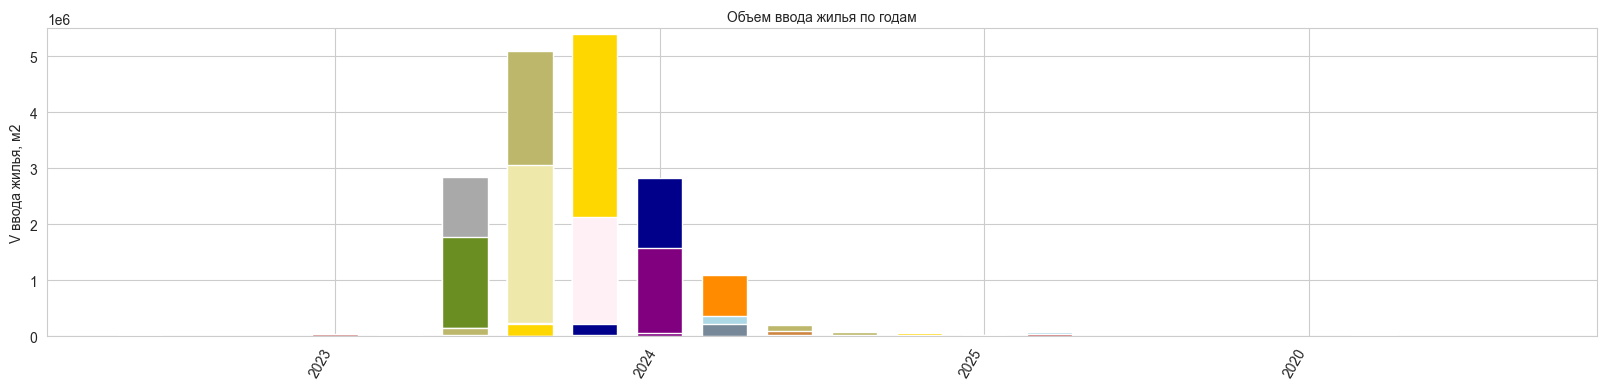

In [27]:

# Prepare Data
#df = df_raw.groupby('manufacturer').size().reset_index(name='counts')
n = dfReadyObjV_pivot['objReady100PercYear'].unique().__len__()+1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

# Plot Bars
plt.figure()
plt.bar(dfReadyObjV_pivot['objReady100PercYear'], dfReadyObjV_pivot['objSquareLiving'], color=c, width=.7)

# Decoration
plt.gca().set_xticklabels(dfReadyObjV_pivot['objReady100PercYear'], rotation=60, horizontalalignment= 'right')
plt.title("Объем ввода жилья по годам", fontsize=10)
plt.ylabel('V ввода жилья, м2')
plt.ylim(0, 5500000)
rcParams['figure.figsize'] = [4,7]
plt.show()

## Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах

In [28]:
dfRegionCompare = df_excel[['region','floorMax','objElemLivingCnt','objSquareLiving','objElemParkingCnt','objPriceAvg']]

In [29]:
dfRegionCompare

,region,floorMax,objElemLivingCnt,objSquareLiving,objElemParkingCnt,objPriceAvg
0,16,13,99,4226.31,0,61267.0
1,50,13,545,27631.00,264,151912.0
2,37,8,183,8770.60,0,50710.0
3,42,14,189,9716.00,0,63800.0
4,50,3,22,1540.00,0,156122.0
...,...,...,...,...,...,...
10593,24,20,288,14157.72,0,78851.0
10594,27,25,89,8110.30,23,138698.0
10595,69,11,129,6700.80,0,62414.0
10596,50,9,0,0.00,146,41263.0


In [91]:
#Сравнение кол-ва этажей
fig = px.box(dfRegionCompare, x="region", y="floorMax", color="region")
fig.show()

In [98]:
dfRegionCompare.describe()

,region,floorMax,objElemLivingCnt,objSquareLiving,objElemParkingCnt,objPriceAvg
count,10598.000000,10598.000000,10598.000000,10598.000000,10598.000000,7.671000e+03
mean,48.516890,12.516324,190.940649,9466.997813,36.659181,1.134512e+05
std,23.226057,8.418518,237.195151,11420.585143,116.327265,1.126680e+05
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03
25%,26.000000,5.000000,40.000000,2116.555000,0.000000,6.306600e+04
50%,50.000000,11.000000,125.000000,6485.200000,0.000000,8.744400e+04
75%,71.000000,18.000000,254.000000,12519.092500,0.000000,1.291070e+05
max,92.000000,76.000000,2676.000000,142978.700000,3580.000000,2.583664e+06


In [106]:
dfRegionCompare.groupby('region').aggregate(func='median')

,floorMax,objElemLivingCnt,objSquareLiving,objElemParkingCnt,objPriceAvg
region,,,,,
1,5.0,89.0,3610.700,0.0,68791.5
2,11.0,157.5,7606.685,0.0,74095.0
3,11.0,105.0,5339.190,0.0,64601.5
4,9.5,62.5,3080.065,0.0,83988.5
5,16.0,147.5,9663.265,0.0,21763.0
...,...,...,...,...,...
79,6.0,50.0,2145.950,0.0,NaN
86,9.0,119.5,6385.500,0.0,93643.0
89,6.0,60.0,2931.720,0.0,78181.0


In [108]:
dfRegionCompare.groupby('region').aggregate(func='count')

,floorMax,objElemLivingCnt,objSquareLiving,objElemParkingCnt,objPriceAvg
region,,,,,
1,41,41,41,41,34
2,304,304,304,304,193
3,63,63,63,63,36
4,4,4,4,4,4
5,16,16,16,16,11
...,...,...,...,...,...
79,1,1,1,1,0
86,58,58,58,58,39
89,34,34,34,34,22


Вывод:  Медиана кол-ва этажей в строящихся зданий 11, при этом наиболее высовик здания строятся в 56 (Оренбургская область) и 66 (Свердловская область) регионе

In [31]:
fig = px.box(dfRegionCompare, x="region", y="objElemLivingCnt", color="region")
fig.show()

Вывод: медиана кол-ва квартир по всем данным - 125 квартир в доме. В регионах 62, 20, 78, 66, 77 строят дома с кол-вом квартир больше 200. При этом в регионах 2, 23, 36, 47, 50, 61, 77, 78 наблюдаются выбросы со строительством домов с более чем 2 тыс. квартир в доме. Кол-во квартир коррелирует с общей жилой площадью дома, это наглядно видно из следующего графика.

In [32]:
fig = px.box(dfRegionCompare, x="region", y="objSquareLiving", color="region")
fig.show()

In [86]:
#Кол-во парковок
fig = px.box(dfRegionCompare, x="region", y="objElemParkingCnt", color="region", width=1000, height=600, range_y=[0, 1500])
fig.show()

Вывод: Большая часть объектов с парковками являются выбросами, что говорит о том, что обычно дома строятся без них.

In [85]:
#Средняя цена за квадрат
fig = px.box(dfRegionCompare, x="region", y="objPriceAvg", color="region", width=1000, height=600, range_y= [0,600000])
fig.show()

Вывод: самое дорогое жилье в Москве (77 регион). Медианное значение цены квадрата болеее 256 тыс руб. Медиана по всем регионам - 87,4 тыс руб за кв

In [87]:
#Тк домов с парковками мало, проанализируем кол-во парковочных мест только среди домов с ними
dfRegionCompare[['region','objElemParkingCnt']].drop(dfRegionCompare.objElemParkingCnt[dfRegionCompare.objElemParkingCnt == 0].index)

,region,objElemParkingCnt
1,50,264
8,77,691
9,76,79
22,78,211
24,21,38
...,...,...
10556,77,354
10565,23,268
10594,27,23
10596,50,146


In [90]:
fig = px.box(dfRegionCompare[['region','objElemParkingCnt']].drop(dfRegionCompare.objElemParkingCnt[dfRegionCompare.objElemParkingCnt == 0].index), x="region", y="objElemParkingCnt", color="region", range_y=[0,1000])
fig.show()

Вывод: В двух регионах 52 (Нижегородская область) и 77 (Москва), наиболее вероятно, что если в доме строится парковка, то она расчитана на более чем 200 машиномест